<a href="https://colab.research.google.com/github/sunil-karki/EHR/blob/main/WRL_EHR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Coursework on module "Work Related Learning(WRL)"
----
###  _WRL Task on "US Electronic Health Record(EHR data)"_
\
#### Islington College, Kathmandu
#### London Metropolitan University
\
##### Prepared by:  Sunil Karki
#####               LondonMet ID: 
#####               College ID:

In [1]:
# Install necessary packages for WRL

# Install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 57 kB/s 
     |████████████████████████████████| 199 kB 87.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=a4edd7b641c05db424f97c77e1db32f2308df250ecf9e5ec9a3213eba2f6a5cd
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [2]:
# Import SparkSession
from pyspark.sql import SparkSession
# Import Spark functions
from pyspark.sql.functions import trim, col, floor, datediff, current_timestamp, \
                                  to_date, lit, when, round, udf
#import IntegerType method from sql.types
from pyspark.sql.types import IntegerType

#Import seaborn
import seaborn as sns
sns.set(rc = {'figure.figsize':(14,5)})

In [3]:
# Create a Spark Session
spark = SparkSession.builder.appName("WRL Test").master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [4]:
#spark.version

Import all source files
-------------------------------------------------------
Source data: Synthetic Patient Generation Realistic Health Data

Link:-  https://synthetichealth.github.io/synthea/

In [5]:
#RDD_allergies = sc.textFile("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/allergies.csv")
df_allergies = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/allergies.csv")
df_careplans = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/careplans.csv")
df_conditions = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/conditions.csv")
df_devices = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/devices.csv")
df_encounters = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/encounters.csv")
df_img_studies = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/imaging_studies.csv")
df_immunizations = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/immunizations.csv")
df_medications = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/medications.csv")
df_observations = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/observations.csv")
df_organizations = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/organizations.csv")
df_patients = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/patients.csv")
df_pyr_transitions = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/payer_transitions.csv")
df_pyr = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/payers.csv")
df_procedures = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/procedures.csv")
df_providers = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/providers.csv")
df_supplies = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/supplies.csv")

In [63]:
#df_patients = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/patients.csv")

In [7]:
df_supplies

DataFrame[DATE: string, PATIENT: string, ENCOUNTER: string, CODE: string, DESCRIPTION: string, QUANTITY: string]

In [8]:
df_allergies.show(5)
rows = df_allergies.count()
print(f"Rows count : {rows}")

+----------+----+--------------------+--------------------+---------+--------------------+
|     START|STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+----------+----+--------------------+--------------------+---------+--------------------+
|1982-10-25|null|76982e06-f8b8-450...|b896bf40-8b72-42b...|300916003|       Latex allergy|
|1982-10-25|null|76982e06-f8b8-450...|b896bf40-8b72-42b...|300913006|   Shellfish allergy|
|2002-01-25|null|71ba0469-f0cc-417...|7be1a590-4239-482...|419474003|    Allergy to mould|
|2002-01-25|null|71ba0469-f0cc-417...|7be1a590-4239-482...|232347008|Dander (animal) a...|
|2002-01-25|null|71ba0469-f0cc-417...|7be1a590-4239-482...|418689008|Allergy to grass ...|
+----------+----+--------------------+--------------------+---------+--------------------+
only showing top 5 rows

Rows count : 597


In [9]:
df_careplans.show(5)
rows = df_careplans.count()
print(f"Rows count : {rows}")

+--------------------+----------+----------+--------------------+--------------------+---------+-------------------+----------+--------------------+
|                  Id|     START|      STOP|             PATIENT|           ENCOUNTER|     CODE|        DESCRIPTION|REASONCODE|   REASONDESCRIPTION|
+--------------------+----------+----------+--------------------+--------------------+---------+-------------------+----------+--------------------+
|d2500b8c-e830-433...|2010-01-23|2012-01-23|034e9e3b-2def-455...|d0c40d10-8d87-447...| 53950000|Respiratory therapy|  10509002|Acute bronchitis ...|
|07d9ddd8-dfa1-4e4...|2011-05-13|2011-08-02|10339b10-3cd1-4ac...|e1ab4933-07a1-49f...| 53950000|Respiratory therapy|  10509002|Acute bronchitis ...|
|a3bb6e99-3b99-44b...|2011-12-31|2012-11-30|f5dcd418-09fe-4a2...|16300c56-a035-412...| 53950000|Respiratory therapy|  10509002|Acute bronchitis ...|
|9f5284b7-425a-486...|2016-12-29|2017-01-05|034e9e3b-2def-455...|3b639086-5fbc-472...| 53950000|Respirator

In [10]:
df_conditions.show(5)
rows = df_conditions.count()
print(f"Rows count : {rows}")

+----------+----------+--------------------+--------------------+---------+--------------------+
|     START|      STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+----------+----------+--------------------+--------------------+---------+--------------------+
|2001-05-01|      null|1d604da9-9a81-4ba...|8f104aa7-4ca9-447...| 40055000|Chronic sinusitis...|
|2011-08-09|2011-08-16|8d4c4326-e9de-4f4...|9d35ec9f-352a-462...|444814009|Viral sinusitis (...|
|2011-11-16|2011-11-26|8d4c4326-e9de-4f4...|ae7555a9-eaff-4c0...|195662009|Acute viral phary...|
|2011-05-13|2011-05-27|10339b10-3cd1-4ac...|e1ab4933-07a1-49f...| 10509002|Acute bronchitis ...|
|2011-02-06|2011-02-14|f5dcd418-09fe-4a2...|b8f76eba-7795-4dc...|195662009|Acute viral phary...|
+----------+----------+--------------------+--------------------+---------+--------------------+
only showing top 5 rows

Rows count : 8376


In [11]:
df_devices.show(5)
rows = df_devices.count()
print(f"Rows count : {rows}")

+--------------------+----+--------------------+--------------------+---------+--------------------+--------------------+
|               START|STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|                 UDI|
+--------------------+----+--------------------+--------------------+---------+--------------------+--------------------+
|2001-07-04T08:42:44Z|null|d49f748f-928d-40e...|2500b8bd-dc98-44e...| 72506001|Implantable defib...|(01)6767798860646...|
|2010-10-24T05:28:51Z|null|e05dd037-e45f-434...|83cda5b1-4653-432...| 72506001|Implantable defib...|(01)2018059525834...|
|2017-06-04T11:11:47Z|null|0f5646bc-a156-4ec...|7302a9ce-5845-456...| 72506001|Implantable defib...|(01)8798892447844...|
|1989-01-17T18:12:03Z|null|44c8b4c8-4457-4ba...|7db01f61-e637-4e4...|705643001|Coronary artery s...|(01)3083189516548...|
|1973-07-19T04:25:46Z|null|89752052-a38b-45f...|e73fe5e1-1b13-436...| 72506001|Implantable defib...|(01)7176772223148...|
+--------------------+--

In [12]:
#An interaction between a patient and healthcare provider(s) for the purpose of providing healthcare service(s) or assessing the health status of a patient.
df_encounters.show(5)
rows = df_encounters.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+--------------------+
|                  Id|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|         DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|   REASONDESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+--------------------+
|d0c40d10-8d87-447...|2010-01-23T17:45:28Z|2010-01-23T18:10:28Z|034e9e3b-2def-455...|e002090d-4e92-300...|e6283e46-fd81-361...|6e2f1a2d-27bd-370...|    ambulatory|

In [13]:
df_img_studies.show(5)
rows = df_img_studies.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------------+--------------------+--------------------+--------------------+
|                  Id|                DATE|             PATIENT|           ENCOUNTER|BODYSITE_CODE|BODYSITE_DESCRIPTION|MODALITY_CODE|MODALITY_DESCRIPTION|            SOP_CODE|     SOP_DESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------------+--------------------+--------------------+--------------------+
|d3e49b38-7634-441...|2014-07-08T15:35:36Z|b58731cc-2d8b-4c2...|3a36836d-da25-4e7...|     40983000|                 Arm|           DX| Digital Radiography|1.2.840.10008.5.1...|Digital X-Ray Ima...|
|46baf530-4941-40a...|2014-01-22T18:58:37Z|2ffe9369-24e4-414...|33b71e4b-0690-4fe...|     40983000|                 Arm|           DX| Digital Radiography|1.2.840.10008.5.1...|Digital X-Ray Ima...|
|b8fb8a6e-

In [14]:
df_immunizations.show(5)
print(f"Rows count : {df_immunizations.count()}")

+--------------------+--------------------+--------------------+----+--------------------+---------+
|                DATE|             PATIENT|           ENCOUNTER|CODE|         DESCRIPTION|BASE_COST|
+--------------------+--------------------+--------------------+----+--------------------+---------+
|2010-07-27T12:58:08Z|10339b10-3cd1-4ac...|dae2b7cb-1316-4b7...| 140|Influenza  season...|   140.52|
|2010-11-20T03:04:34Z|f5dcd418-09fe-4a2...|7ff86631-0378-4bf...| 140|Influenza  season...|   140.52|
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...| 140|Influenza  season...|   140.52|
|2011-11-26T03:04:34Z|f5dcd418-09fe-4a2...|1923c698-accd-4d7...| 140|Influenza  season...|   140.52|
|2011-07-28T15:02:18Z|1d604da9-9a81-4ba...|b85c339a-6076-43e...| 140|Influenza  season...|   140.52|
+--------------------+--------------------+--------------------+----+--------------------+---------+
only showing top 5 rows

Rows count : 15478


In [15]:
df_medications.show(5)
rows = df_medications.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|               START|                STOP|             PATIENT|               PAYER|           ENCOUNTER|  CODE|         DESCRIPTION|BASE_COST|PAYER_COVERAGE|DISPENSES|TOTALCOST|REASONCODE|   REASONDESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|2010-05-05T00:26:23Z|2011-04-30T00:26:23Z|8d4c4326-e9de-4f4...|b1c428d6-4f07-31e...|1e0d6b0e-1711-4a2...|389221|Etonogestrel 68 M...|   677.08|          0.00|       12|  8124.96|      null|                null|
|2011-04-30T00:26:23Z|2012-04-24T00:26:23Z|8d4c4326-e9de-4f4...|b1c428d6-4f07-31e...|6aa37300-d1b4-48e...|389221|Etonogestrel 68 M...|   624.09|        

In [16]:
df_observations.show(5)
rows = df_observations.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|                DATE|             PATIENT|           ENCOUNTER|   CODE|         DESCRIPTION|VALUE|  UNITS|   TYPE|
+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...| 8302-2|         Body Height|193.3|     cm|numeric|
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...|72514-3|Pain severity - 0...|  2.0|{score}|numeric|
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...|29463-7|         Body Weight| 87.8|     kg|numeric|
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...|39156-5|     Body Mass Index| 23.5|  kg/m2|numeric|
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...| 8462-4|Diastolic Blood P...| 82.0| mm[Hg]|numeric|
+--------------------+--------------------+--------------------+-------+

In [17]:
df_organizations.show(5)
rows = df_organizations.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+----------+-----+-----+---------+----------+----------+------------------+-----------+
|                  Id|                NAME|             ADDRESS|      CITY|STATE|  ZIP|      LAT|       LON|     PHONE|           REVENUE|UTILIZATION|
+--------------------+--------------------+--------------------+----------+-----+-----+---------+----------+----------+------------------+-----------+
|ef58ea08-d883-395...|HEALTHALLIANCE HO...|    60 HOSPITAL ROAD|LEOMINSTER|   MA|01453|42.520838|-71.770876|9784662000|198002.28000000442|       1557|
|69176529-fd1f-3b3...|MOUNT AUBURN HOSP...|330 MOUNT AUBURN ...| CAMBRIDGE|   MA|02138|42.375967|-71.118275|6174923500| 288569.1700000008|       2296|
|5e765f2b-e908-388...|STURDY MEMORIAL H...|     211 PARK STREET| ATTLEBORO|   MA|02703|41.931653|-71.294503|5082225200|287355.03000000096|       2287|
|f1fbcbfb-fcfa-3bd...|LAWRENCE GENERAL ...|  ONE GENERAL STREET|  LAWRENCE|   MA|01842|42.7002

In [18]:
df_patients.show(5)
rows = df_patients.count()
print(f"Rows count : {rows}")

+--------------------+----------+---------+-----------+---------+----------+------+---------------+-------------+------+-------------+-------+-----+-----------+------+--------------------+--------------------+----------+-------------+----------------+-----+------------------+------------------+-------------------+-------------------+
|                  Id| BIRTHDATE|DEATHDATE|        SSN|  DRIVERS|  PASSPORT|PREFIX|          FIRST|         LAST|SUFFIX|       MAIDEN|MARITAL| RACE|  ETHNICITY|GENDER|          BIRTHPLACE|             ADDRESS|      CITY|        STATE|          COUNTY|  ZIP|               LAT|               LON|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+--------------------+----------+---------+-----------+---------+----------+------+---------------+-------------+------+-------------+-------+-----+-----------+------+--------------------+--------------------+----------+-------------+----------------+-----+------------------+------------------+-------------------+-------------

In [19]:
df_pyr_transitions.show(5)
rows = df_pyr_transitions.count()
print(f"Rows count : {rows}")

+--------------------+----------+--------+--------------------+---------+
|             PATIENT|START_YEAR|END_YEAR|               PAYER|OWNERSHIP|
+--------------------+----------+--------+--------------------+---------+
|1d604da9-9a81-4ba...|      1989|    1998|b1c428d6-4f07-31e...| Guardian|
|034e9e3b-2def-455...|      1983|    2001|6e2f1a2d-27bd-370...| Guardian|
|8d4c4326-e9de-4f4...|      1978|    1995|7c4411ce-02f1-39b...| Guardian|
|8d4c4326-e9de-4f4...|      1996|    1996|5059a55e-5d6e-34d...|     Self|
|8d4c4326-e9de-4f4...|      1997|    1999|7c4411ce-02f1-39b...|     Self|
+--------------------+----------+--------+--------------------+---------+
only showing top 5 rows

Rows count : 3801


In [20]:
df_pyr.show(5)
rows = df_pyr.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+------------------+----------+-------------------+-----+--------------+--------------+----------------+------------+------------------+--------------------+-------------------+---------------------+------------------+--------------------+---------------------+-----------------------+----------------+-------------------+-------------+
|                  Id|                NAME|           ADDRESS|      CITY|STATE_HEADQUARTERED|  ZIP|         PHONE|AMOUNT_COVERED|AMOUNT_UNCOVERED|     REVENUE|COVERED_ENCOUNTERS|UNCOVERED_ENCOUNTERS|COVERED_MEDICATIONS|UNCOVERED_MEDICATIONS|COVERED_PROCEDURES|UNCOVERED_PROCEDURES|COVERED_IMMUNIZATIONS|UNCOVERED_IMMUNIZATIONS|UNIQUE_CUSTOMERS|           QOLS_AVG|MEMBER_MONTHS|
+--------------------+--------------------+------------------+----------+-------------------+-----+--------------+--------------+----------------+------------+------------------+--------------------+-------------------+---------------------+-

In [21]:
df_procedures.show(5)
rows = df_procedures.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+--------------------+
|                DATE|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|BASE_COST|REASONCODE|   REASONDESCRIPTION|
+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+--------------------+
|2011-04-30T00:26:23Z|8d4c4326-e9de-4f4...|6aa37300-d1b4-48e...|169553002|Insertion of subc...| 14896.56|      null|                null|
|2010-07-27T12:58:08Z|10339b10-3cd1-4ac...|dae2b7cb-1316-4b7...|430193006|Medication Reconc...|   726.51|      null|                null|
|2010-11-20T03:04:34Z|f5dcd418-09fe-4a2...|7ff86631-0378-4bf...|430193006|Medication Reconc...|   788.50|      null|                null|
|2011-02-07T03:04:34Z|f5dcd418-09fe-4a2...|b8f76eba-7795-4dc...|117015009|Throat culture (p...|  2070.44| 195662009|Acute viral phary...|
|2011-04-19T03:04:34Z|f5dcd418-09f

In [22]:
df_providers.show(5)
rows = df_providers.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+------+----------------+--------------------+----------+-----+-----+---------+----------+-----------+
|                  Id|        ORGANIZATION|                NAME|GENDER|      SPECIALITY|             ADDRESS|      CITY|STATE|  ZIP|      LAT|       LON|UTILIZATION|
+--------------------+--------------------+--------------------+------+----------------+--------------------+----------+-----+-----+---------+----------+-----------+
|3421aa75-dec7-378...|ef58ea08-d883-395...|   Tomas436 Sauer652|     M|GENERAL PRACTICE|    60 HOSPITAL ROAD|LEOMINSTER|   MA|01453|42.520838|-71.770876|       1557|
|c9b3c857-2e24-320...|69176529-fd1f-3b3...|Suzette512 Monaha...|     F|GENERAL PRACTICE|330 MOUNT AUBURN ...| CAMBRIDGE|   MA|02138|42.375967|-71.118275|       2296|
|0359f968-d1a6-30e...|5e765f2b-e908-388...|Gaynell126 Streic...|     F|GENERAL PRACTICE|     211 PARK STREET| ATTLEBORO|   MA|02703|41.931653|-71.294503|       2287|
|446

In [23]:
df_supplies.show(5)
rows = df_supplies.count()
print(f"Rows count : {rows}")

+----+-------+---------+----+-----------+--------+
|DATE|PATIENT|ENCOUNTER|CODE|DESCRIPTION|QUANTITY|
+----+-------+---------+----+-----------+--------+
+----+-------+---------+----+-----------+--------+

Rows count : 0


Cleaning/Preprocessing the data

----------------

In [24]:
# Change name of header in each dataframe to avoid ambiguity during analysis
df_careplans = df_careplans.withColumnRenamed("Id","CAREPLAN_ID")
df_encounters = df_encounters.withColumnRenamed("Id","ENCOUNTERS_ID")
df_img_studies = df_img_studies.withColumnRenamed("Id","IMGSTUDIES_ID")
df_organizations = df_organizations.withColumnRenamed("Id","ORG_ID")
df_patients = df_patients.withColumnRenamed("Id","PATIENT_ID")
df_pyr = df_pyr.withColumnRenamed("Id","PYR_ID")
df_providers = df_providers.withColumnRenamed("Id","PROV_ID")
df_careplans.printSchema()

root
 |-- CAREPLAN_ID: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- PATIENT: string (nullable = true)
 |-- ENCOUNTER: string (nullable = true)
 |-- CODE: string (nullable = true)
 |-- DESCRIPTION: string (nullable = true)
 |-- REASONCODE: string (nullable = true)
 |-- REASONDESCRIPTION: string (nullable = true)



In [64]:
#df_patients = df_patients.withColumnRenamed("Id","PATIENT_ID")

In [26]:
df_patients.printSchema()

root
 |-- PATIENT_ID: string (nullable = true)
 |-- BIRTHDATE: string (nullable = true)
 |-- DEATHDATE: string (nullable = true)
 |-- SSN: string (nullable = true)
 |-- DRIVERS: string (nullable = true)
 |-- PASSPORT: string (nullable = true)
 |-- PREFIX: string (nullable = true)
 |-- FIRST: string (nullable = true)
 |-- LAST: string (nullable = true)
 |-- SUFFIX: string (nullable = true)
 |-- MAIDEN: string (nullable = true)
 |-- MARITAL: string (nullable = true)
 |-- RACE: string (nullable = true)
 |-- ETHNICITY: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- BIRTHPLACE: string (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- ZIP: string (nullable = true)
 |-- LAT: string (nullable = true)
 |-- LON: string (nullable = true)
 |-- HEALTHCARE_EXPENSES: string (nullable = true)
 |-- HEALTHCARE_COVERAGE: string (nullable = true)



In [27]:
# Checking any duplicate patient entry in df_patients
temp_RDD = df_patients.groupBy("PATIENT_ID").count()
temp_RDD.filter("PATIENT_ID > 1").show()

+----------+-----+
|PATIENT_ID|count|
+----------+-----+
+----------+-----+



Conclusion: This states that there are unique patient per each record in the df_patients dataframe.

No cleaning needed for duplicate record.

In [28]:
df_encounters.printSchema()

root
 |-- ENCOUNTERS_ID: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- PATIENT: string (nullable = true)
 |-- ORGANIZATION: string (nullable = true)
 |-- PROVIDER: string (nullable = true)
 |-- PAYER: string (nullable = true)
 |-- ENCOUNTERCLASS: string (nullable = true)
 |-- CODE: string (nullable = true)
 |-- DESCRIPTION: string (nullable = true)
 |-- BASE_ENCOUNTER_COST: string (nullable = true)
 |-- TOTAL_CLAIM_COST: string (nullable = true)
 |-- PAYER_COVERAGE: string (nullable = true)
 |-- REASONCODE: string (nullable = true)
 |-- REASONDESCRIPTION: string (nullable = true)



In [29]:
df_immunizations.select("DESCRIPTION").distinct().show(20, False)

+--------------------------------------------------+
|DESCRIPTION                                       |
+--------------------------------------------------+
|IPV                                               |
|Influenza  seasonal  injectable  preservative free|
|Tdap                                              |
|pneumococcal polysaccharide vaccine  23 valent    |
|Hep A  adult                                      |
|Hep B  adult                                      |
|HPV  quadrivalent                                 |
|Hep B  adolescent or pediatric                    |
|meningococcal MCV4P                               |
|Td (adult) preservative free                      |
|Hep A  ped/adol  2 dose                           |
|DTaP                                              |
|rotavirus  monovalent                             |
|varicella                                         |
|Pneumococcal conjugate PCV 13                     |
|zoster                                       

In [30]:
# df3 = df_immunizations.withColumn("DESCRIPTION", \
            #     when(df_immunizations.DESCRIPTION == "pneumococcal polysaccharide vaccine  23 valent","Pneumococcal vaccine") \
            # .when(df_immunizations.DESCRIPTION == "F","Female") \
            # .otherwise(df.gender))

In [65]:
# Converting field type from string to numeric for df_patients
df_patients = df_patients.withColumn("HEALTHCARE_EXPENSES",df_patients.HEALTHCARE_EXPENSES.cast(IntegerType())) \
                         .withColumn("HEALTHCARE_COVERAGE",df_patients.HEALTHCARE_COVERAGE.cast(IntegerType()))

In [66]:
# Adding new field to df_patients called 'AGE'
# If DEATHDATE is NOT null Then AGE = DEATHDATE - BIRTHDATE 
# Else AGE = 2020/04/01 - BIRTHDATE

df_patients = df_patients.withColumn("AGE", \
                                     when( col("DEATHDATE").isNotNull() , floor(datediff(col("DEATHDATE"), col("BIRTHDATE"))/365.25) ) \
                                     .otherwise( floor(datediff(to_date(lit("2020-04-01")), col("BIRTHDATE"))/365.25) ) \
                                    )

**Note:** The source data is from April 2020. So calculating patient's age w.r.t this date.

In [33]:
df_patients.filter("AGE > 100").select("AGE").distinct().show()

+---+
|AGE|
+---+
|110|
|104|
|106|
|105|
|108|
|102|
+---+



**Conclusion:** There are patient who are with age above 100. It could also mean their deathdate might not have been recorded.

In [67]:
# Adding new field to df_patients called 'DEATH' to determine if patient
df_patients = df_patients.withColumn("DEATH", \
                                     when( col("DEATHDATE").isNotNull() , "Y" ) \
                                     .otherwise( "N") \
                                    )
#df_patients.filter("DEATH == 'Y'").show()

In [68]:
# Adding new field to df_patients called 'age_category' to group the age of patients
age_group = udf(lambda age: '< 10' if age < 10 else \
                       '10-19' if (age >= 10 and age < 20) else \
                       '20-29' if (age >= 20 and age < 30) else \
                       '30-39' if (age >= 30 and age < 40) else \
                       '40-49' if (age >= 40 and age < 50) else \
                       '50-59' if (age >= 50 and age < 60) else \
                       '60-69' if (age >= 60 and age < 70) else \
                       '70-79' if (age >= 70 and age < 80) else \
                       '80-89' if (age >= 80 and age < 90) else \
                       '90-99' if (age >= 90 and age < 100) else \
                       '100+'  if (age >= 100) else '')

df_patients = df_patients.withColumn('AGE_CATEGORY', age_group(df_patients.AGE))
df_patients.show()

+--------------------+----------+---------+-----------+---------+----------+------+---------------+--------------+------+-------------+-------+-----+-----------+------+--------------------+--------------------+-----------+-------------+----------------+-----+------------------+------------------+-------------------+-------------------+---+-----+------------+
|          PATIENT_ID| BIRTHDATE|DEATHDATE|        SSN|  DRIVERS|  PASSPORT|PREFIX|          FIRST|          LAST|SUFFIX|       MAIDEN|MARITAL| RACE|  ETHNICITY|GENDER|          BIRTHPLACE|             ADDRESS|       CITY|        STATE|          COUNTY|  ZIP|               LAT|               LON|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|AGE|DEATH|age_category|
+--------------------+----------+---------+-----------+---------+----------+------+---------------+--------------+------+-------------+-------+-----+-----------+------+--------------------+--------------------+-----------+-------------+----------------+-----+------------------+

In [36]:
# Converting field type from string to numeric for df_encounter
df_encounters = df_encounters.withColumn("BASE_ENCOUNTER_COST",df_encounters.BASE_ENCOUNTER_COST.cast(IntegerType())) \
                             .withColumn("TOTAL_CLAIM_COST",df_encounters.TOTAL_CLAIM_COST.cast(IntegerType())) \
                             .withColumn("PAYER_COVERAGE",df_encounters.PAYER_COVERAGE.cast(IntegerType()))

In [69]:
# Selecting selective columns like ID, NAME, EXPENSES for patients
df_patients = df_patients.select("PATIENT_ID","SSN","DRIVERS","FIRST","LAST","MAIDEN","GENDER","AGE","DEATH","AGE_CATEGORY","HEALTHCARE_EXPENSES","HEALTHCARE_COVERAGE")
df_patients.show(5)

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|age_category|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+
|1d604da9-9a81-4ba...|999-76-6866|S99984236|José Eduardo181|     Gómez206|         null|     M| 30|    N|       30-39|             271227|               1334|
|034e9e3b-2def-455...|999-73-5361|S99962402|        Milo271|      Feil794|         null|     M| 36|    N|       30-39|             793946|               3204|
|10339b10-3cd1-4ac...|999-27-3385|S99972682|      Jayson808|     Fadel536|         null|     M| 27|    N|       20-29|             574111|               2606|
|8d4c4326-e9de-4f4...|999-85-4926|S99974448|  

Initial Data Analysis

------------

In [38]:
# Convert df_patients dataframe to pandas dataframe
pd_temp_RDD = df_patients.select("AGE").toPandas()

In [39]:
#Summary statistics of columns: AGE
pd_temp_RDD[["AGE"]].describe()

,AGE
count,1171.000000
mean,41.070026
std,24.338536
min,0.000000
25%,21.000000
50%,41.000000
75%,60.000000
max,110.000000


In [82]:
temp_RDD = df_patients.groupBy("AGE_CATEGORY").avg("HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE").orderBy("AGE_CATEGORY")
temp_RDD.show()

+------------+------------------------+------------------------+
|age_category|avg(HEALTHCARE_EXPENSES)|avg(HEALTHCARE_COVERAGE)|
+------------+------------------------+------------------------+
|       10-19|       291299.4013157895|      3382.4473684210525|
|        100+|      1429707.3636363635|       51664.90909090909|
|       20-29|       498243.7261146497|        5086.15923566879|
|       30-39|       641683.0222222222|       6656.303703703704|
|       40-49|       840298.3092105263|       9630.644736842105|
|       50-59|      1051205.9144736843|       17393.58552631579|
|       60-69|      1221377.5194805195|      17692.766233766233|
|       70-79|      1338649.2771084337|       26864.77108433735|
|       80-89|      1457951.2285714287|      28733.428571428572|
|       90-99|      1137745.5789473683|      110519.42105263157|
|        < 10|       95333.48760330578|       1623.206611570248|
+------------+------------------------+------------------------+



[Text(0.5, 1.0, 'Age-Group comparing their average health expenses and average health coverage')]

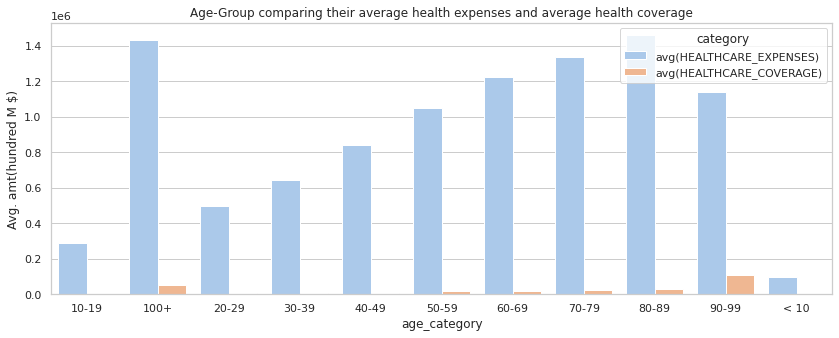

In [90]:
pd_temp_RDD = temp_RDD.toPandas()

sns.set(color_codes=True)
sns.set(style="whitegrid", palette="pastel")

# Barplot for age-group comparing their average health expenses and average health coverage
sns.barplot(data=pd_temp_RDD.melt(id_vars='AGE_CATEGORY',
                                  value_name='Avg. amt(hundred M $)', var_name='category'),
            x='AGE_CATEGORY', y='Avg. amt(hundred M $)', hue='category')  \
            .set(title='Age-Group comparing their average health expenses and average health coverage')

**Conclusion:** Average healthcare expenses is higher than the average healthcare coverage in all age groups.

In [40]:
# 
df_patients.filter("AGE > 100").show()

+--------------------+-----------+---------+-----------+-------------+--------------+------+---+-----+-------------------+-------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|         LAST|        MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+--------------------+-----------+---------+-----------+-------------+--------------+------+---+-----+-------------------+-------------------+
|f1921fc3-fdfc-441...|999-71-4454|S99968762|Sharleen176|     Kulas532|    Rolfson709|     F|110|    N|             495271|              39995|
|6abdc54d-098e-47d...|999-68-6750|S99953863| Enedina292|Macejkovic424|Schamberger479|     F|104|    N|            1512751|              43528|
|6d8fdec1-d77d-417...|999-32-3912|S99964540|  Santos184|       Fay398|          null|     M|108|    N|             155173|              16761|
|475b2a8b-19a0-451...|999-38-4849|S99959961|  Manual570| Kertzmann286|          null|     M|106|    N|            1865296|              32608|

In [91]:
df_encounters.orderBy("ENCOUNTERS_ID").show(5)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+-----------------+
|       ENCOUNTERS_ID|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|         DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+-----------------+
|0000d0b7-937c-498...|1994-09-07T04:48:12Z|1994-09-07T05:03:12Z|714b9c18-783d-4f5...|5259a506-b80b-3ed...|3a65bdb3-12b2-324...|d47b3510-2895-3b7...|      wellness|162673000

In [42]:
# patients x encounters
pat_enc = df_patients.join(df_encounters, trim(df_patients.PATIENT_ID) == trim(df_encounters.PATIENT))
pat_enc.show(5)
print(f"Rows count : {pat_enc.count()}")

+--------------------+-----------+---------+---------------+--------+------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|    LAST|MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|       ENCOUNTERS_ID|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|         DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+---------------+--------+------+------+---+-----+-------------------+-------------------+--------------------+--------------------+---

In [43]:
temp_RDD = pat_enc.groupBy("REASONCODE").sum("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE", "HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE")
temp_RDD.show(5)
print(f"Rows count : {temp_RDD.count()}")

+----------+------------------------+---------------------+-------------------+------------------------+------------------------+
|REASONCODE|sum(BASE_ENCOUNTER_COST)|sum(TOTAL_CLAIM_COST)|sum(PAYER_COVERAGE)|sum(HEALTHCARE_EXPENSES)|sum(HEALTHCARE_COVERAGE)|
+----------+------------------------+---------------------+-------------------+------------------------+------------------------+
| 301011002|                    7482|                 7482|               2582|                51873681|                  574753|
| 359817006|                    1419|                 1419|                695|                 7867530|                  256877|
|  26929004|                    5676|                 5676|               3647|                58494741|                 1036959|
|  62564004|                    2967|                 2967|               1226|                14788644|                  270229|
|  65275009|                     129|                  129|                 69|           

In [44]:
temp_RDD = pat_enc.groupBy("ENCOUNTERCLASS").sum("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE", "HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE")
temp_RDD.show(7)
print(f"Rows count : {temp_RDD.count()}")

+--------------+------------------------+---------------------+-------------------+------------------------+------------------------+
|ENCOUNTERCLASS|sum(BASE_ENCOUNTER_COST)|sum(TOTAL_CLAIM_COST)|sum(PAYER_COVERAGE)|sum(HEALTHCARE_EXPENSES)|sum(HEALTHCARE_COVERAGE)|
+--------------+------------------------+---------------------+-------------------+------------------------+------------------------+
|      wellness|                 2464674|              2464674|            1768169|             17852261350|               442254240|
|    outpatient|                 1161387|              1161387|             265231|              8614823270|               729466798|
|     emergency|                  269610|               269610|             122801|              1931719609|               190217699|
|     inpatient|                  215106|               215106|              81045|              1695314453|               152263991|
|    urgentcare|                  306117|               306117

In [45]:
# Find distinct PATIENT, ORGANIZATION, PROVIDER, PAYER
temp_RDD = pat_enc.select('PATIENT').distinct()
#temp_RDD.show(5)
print(f"Distinct PATIENT Rows count : {temp_RDD.count()}")
temp_RDD = pat_enc.select('ORGANIZATION').distinct()
print(f"Distinct ORGANIZATION Rows count : {temp_RDD.count()}")
temp_RDD = pat_enc.select('PROVIDER').distinct()
print(f"Distinct PROVIDER Rows count : {temp_RDD.count()}")
temp_RDD = pat_enc.select('PAYER').distinct()
print(f"Distinct PAYER Rows count : {temp_RDD.count()}")

Distinct PATIENT Rows count : 1171
Distinct ORGANIZATION Rows count : 1103
Distinct PROVIDER Rows count : 1104
Distinct PAYER Rows count : 10


In [46]:
# Finding payer coverage report
payer_coverage_detail = pat_enc.groupBy("PAYER").sum("TOTAL_CLAIM_COST", "PAYER_COVERAGE")
payer_coverage_detail = payer_coverage_detail.join(df_pyr, trim(payer_coverage_detail.PAYER) == trim(df_pyr.PYR_ID))
payer_coverage_detail.select("NAME", "sum(TOTAL_CLAIM_COST)", "sum(PAYER_COVERAGE)", "AMOUNT_COVERED", "AMOUNT_UNCOVERED", "REVENUE").show(7)

+--------------------+---------------------+-------------------+--------------+----------------+------------+
|                NAME|sum(TOTAL_CLAIM_COST)|sum(PAYER_COVERAGE)|AMOUNT_COVERED|AMOUNT_UNCOVERED|     REVENUE|
+--------------------+---------------------+-------------------+--------------+----------------+------------+
|        Cigna Health|               485034|             303516|     909661.78|       635040.00|154184100.00|
|Blue Cross Blue S...|               849628|             434614|    2741717.82|      1431463.91|140652000.00|
|              Anthem|               293217|             224826|     526943.60|       258995.00|152248800.00|
|            Medicare|              1244101|             793710|    4756720.13|       890394.37|  7122250.00|
|        NO_INSURANCE|              1308779|                  0|          0.00|     10129408.90|        0.00|
|       Dual Eligible|                92079|              30496|     141676.87|       119449.83|  1305000.00|
|         

In [47]:
# Finding payer coverage report with encounterclass
payer_coverage_detail_2 = pat_enc.groupBy("PAYER", "ENCOUNTERCLASS").sum("TOTAL_CLAIM_COST", "PAYER_COVERAGE")
payer_coverage_detail_2 = payer_coverage_detail_2.join(df_pyr, trim(payer_coverage_detail.PAYER) == trim(df_pyr.PYR_ID))
payer_coverage_detail_2 = payer_coverage_detail_2.select("NAME", "ENCOUNTERCLASS", "sum(TOTAL_CLAIM_COST)", "sum(PAYER_COVERAGE)", "AMOUNT_COVERED", "AMOUNT_UNCOVERED", "REVENUE")
payer_coverage_detail_2.orderBy(col("NAME"), col("ENCOUNTERCLASS")).show()

+--------------------+--------------+---------------------+-------------------+--------------+----------------+------------+
|                NAME|ENCOUNTERCLASS|sum(TOTAL_CLAIM_COST)|sum(PAYER_COVERAGE)|AMOUNT_COVERED|AMOUNT_UNCOVERED|     REVENUE|
+--------------------+--------------+---------------------+-------------------+--------------+----------------+------------+
|               Aetna|    ambulatory|               161250|              79872|     827367.40|       652470.00|141468000.00|
|               Aetna|     emergency|                18060|               8576|     827367.40|       652470.00|141468000.00|
|               Aetna|     inpatient|                 5362|               2308|     827367.40|       652470.00|141468000.00|
|               Aetna|    outpatient|                 4773|                  0|     827367.40|       652470.00|141468000.00|
|               Aetna|    urgentcare|                10320|                  0|     827367.40|       652470.00|141468000.00|


In [48]:
pat_immuniz = df_patients.join(df_immunizations, trim(df_patients.PATIENT_ID) == trim(df_immunizations.PATIENT))
print(f"Rows count : {pat_immuniz.count()}") #15478
pat_immuniz = pat_immuniz.join(df_encounters, trim(pat_immuniz.ENCOUNTER) == trim(df_encounters.ENCOUNTERS_ID) )
#pat_immuniz.orderBy(col("PATIENT_ID"), col("DATE")).show(5)
print(f"Rows count : {pat_immuniz.count()}") #15478
pat_immuniz.select("ENCOUNTERCLASS").distinct().show(5)

pat_immuniz.filter(trim(col("ENCOUNTERCLASS")) == "emergency").show(5)

Rows count : 15478
Rows count : 15478
+--------------+
|ENCOUNTERCLASS|
+--------------+
|      wellness|
|    outpatient|
|     emergency|
|    urgentcare|
+--------------+

+--------------------+-----------+---------+---------+--------------+------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+----+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+--------+-------------------+-------------------+----------------+--------------+----------+-----------------+
|          PATIENT_ID|        SSN|  DRIVERS|    FIRST|          LAST|MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|CODE|         DESCRIPTION|BASE_COST|       ENCOUNTERS_ID|               START|                STOP|             PATIENT|    

In [49]:
temp_RDD = df_immunizations.select("DESCRIPTION").distinct()
print(temp_RDD.show(20, False))

+--------------------------------------------------+
|DESCRIPTION                                       |
+--------------------------------------------------+
|IPV                                               |
|Influenza  seasonal  injectable  preservative free|
|Tdap                                              |
|pneumococcal polysaccharide vaccine  23 valent    |
|Hep A  adult                                      |
|Hep B  adult                                      |
|HPV  quadrivalent                                 |
|Hep B  adolescent or pediatric                    |
|meningococcal MCV4P                               |
|Td (adult) preservative free                      |
|Hep A  ped/adol  2 dose                           |
|DTaP                                              |
|rotavirus  monovalent                             |
|varicella                                         |
|Pneumococcal conjugate PCV 13                     |
|zoster                                       

In [50]:
rows = df_immunizations.select("PATIENT").distinct().count() #1169
print(f"No. of patient who took immunization: {rows}")
rows = df_patients.select("PATIENT_ID").distinct().count() #1171
print(f"No. of patient in EHR record: {rows}")

No. of patient who took immunization: 1169
No. of patient in EHR record: 1171


Conclusion: There are 1171 - 1169 = 2 who have not taken any immunizations till date or not recorded to take any immunization.

Joins

 -----------

In [51]:
temp_RDD = df_patients.join(df_careplans, trim(df_patients.PATIENT_ID) == trim(df_careplans.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-----------+--------+------+------+---+-----+-------------------+-------------------+--------------------+----------+----------+--------------------+--------------------+---------+-------------------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|    LAST|MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|         CAREPLAN_ID|     START|      STOP|             PATIENT|           ENCOUNTER|     CODE|        DESCRIPTION|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+-----------+--------+------+------+---+-----+-------------------+-------------------+--------------------+----------+----------+--------------------+--------------------+---------+-------------------+----------+--------------------+
|034e9e3b-2def-455...|999-73-5361|S99962402|    Milo271| Feil794|  null|     M| 36|    N|             793946|               3204|d2500b8c-e830-433...|2010-01-23|2012-01-

In [52]:
temp_RDD = df_patients.join(df_pyr_transitions, trim(df_patients.PATIENT_ID) == trim(df_pyr_transitions.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+----------+--------+--------------------+---------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|             PATIENT|START_YEAR|END_YEAR|               PAYER|OWNERSHIP|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+----------+--------+--------------------+---------+
|1d604da9-9a81-4ba...|999-76-6866|S99984236|José Eduardo181|     Gómez206|         null|     M| 30|    N|             271227|               1334|1d604da9-9a81-4ba...|      1989|    1998|b1c428d6-4f07-31e...| Guardian|
|034e9e3b-2def-455...|999-73-5361|S99962402|        Milo271|      Feil794|         null|     M| 36|    N|             793946|   

In [53]:
temp_RDD = df_patients.join(df_observations, trim(df_patients.PATIENT_ID) == trim(df_observations.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-------+-------+------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|          PATIENT_ID|        SSN|  DRIVERS|  FIRST|   LAST|MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|   CODE|         DESCRIPTION|VALUE|  UNITS|   TYPE|
+--------------------+-----------+---------+-------+-------+------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|034e9e3b-2def-455...|999-73-5361|S99962402|Milo271|Feil794|  null|     M| 36|    N|             793946|               3204|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...| 8302-2|         Body Height|193.3|     cm|numeric|
|034e9e3b-2def-455...|999-73-5361|S99962402|

In [54]:
temp_RDD = df_patients.join(df_immunizations, trim(df_patients.PATIENT_ID) == trim(df_immunizations.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+--------+------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+----+--------------------+---------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|    LAST|MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|CODE|         DESCRIPTION|BASE_COST|
+--------------------+-----------+---------+---------------+--------+------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+----+--------------------+---------+
|10339b10-3cd1-4ac...|999-27-3385|S99972682|      Jayson808|Fadel536|  null|     M| 27|    N|             574111|               2606|2010-07-27T12:58:08Z|10339b10-3cd1-4ac...|dae2b7cb-1316-4b7...| 140|Influenza  season...|   140.52|
|f5dcd418-09fe-4a2...|999-60-7372|S99915787|    Gregorio366|  Auer97

In [55]:
temp_RDD = df_patients.join(df_procedures, trim(df_patients.PATIENT_ID) == trim(df_procedures.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-----------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|BASE_COST|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+-----------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+--------------------+
|8d4c4326-e9de-4f4...|999-85-4926|S99974448| Mariana775|Rutherford999|Williamson769|     F| 41|    N|             935630|               8756|2011-04-30T00:26:23Z|8d4c

In [56]:
temp_RDD = df_patients.join(df_devices, trim(df_patients.PATIENT_ID) == trim(df_devices.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------+-------------+---------------+------+---+-----+-------------------+-------------------+--------------------+----+--------------------+--------------------+---------+--------------------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|    FIRST|         LAST|         MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|               START|STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|                 UDI|
+--------------------+-----------+---------+---------+-------------+---------------+------+---+-----+-------------------+-------------------+--------------------+----+--------------------+--------------------+---------+--------------------+--------------------+
|d49f748f-928d-40e...|999-15-5162|S99979086|Wesley533|       Rau926|           null|     M| 52|    N|            1096170|               5593|2001-07-04T08:42:44Z|null|d49f748f-928d-40e...|2500b8bd-dc98-44e...| 7250

In [57]:
temp_RDD = df_patients.join(df_allergies, trim(df_patients.PATIENT_ID) == trim(df_allergies.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-----------+-------------+------+------+---+-----+-------------------+-------------------+----------+----+--------------------+--------------------+---------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|         LAST|MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|     START|STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+--------------------+-----------+---------+-----------+-------------+------+------+---+-----+-------------------+-------------------+----------+----+--------------------+--------------------+---------+--------------------+
|76982e06-f8b8-450...|999-21-5604|S99957470|Christal240|      Brown30|  null|     F| 37|    N|             779464|              11713|1982-10-25|null|76982e06-f8b8-450...|b896bf40-8b72-42b...|300913006|   Shellfish allergy|
|76982e06-f8b8-450...|999-21-5604|S99957470|Christal240|      Brown30|  null|     F| 37|    N|          

In [58]:
temp_RDD = df_patients.join(df_conditions, trim(df_patients.PATIENT_ID) == trim(df_conditions.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+----------+----------+--------------------+--------------------+---------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|     START|      STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+----------+----------+--------------------+--------------------+---------+--------------------+
|1d604da9-9a81-4ba...|999-76-6866|S99984236|José Eduardo181|     Gómez206|         null|     M| 30|    N|             271227|               1334|2001-05-01|      null|1d604da9-9a81-4ba...|8f104aa7-4ca9-447...| 40055000|Chronic sinusitis...|
|8d4c4326-e9de-4f4...|999-85-4926|S9

In [59]:
temp_RDD = df_patients.join(df_medications, trim(df_patients.PATIENT_ID) == trim(df_medications.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|               START|                STOP|             PATIENT|               PAYER|           ENCOUNTER|  CODE|         DESCRIPTION|BASE_COST|PAYER_COVERAGE|DISPENSES|TOTALCOST|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+

In [60]:

temp_RDD = df_patients.join(df_medications, trim(df_patients.PATIENT_ID) == trim(df_medications.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|               START|                STOP|             PATIENT|               PAYER|           ENCOUNTER|  CODE|         DESCRIPTION|BASE_COST|PAYER_COVERAGE|DISPENSES|TOTALCOST|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+

----

In [61]:
#ta = df_conditions.alias('ta')
#tb = df_immunizations.alias('tb')
#inner_join = ta.join(tb, ta.name == tb.name)
#inner_join.show()

In [62]:
pat_enc.filter("PAYER_COVERAGE is null").show()

+----------+---+-------+-----+----+------+------+---+-----+-------------------+-------------------+-------------+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+
|PATIENT_ID|SSN|DRIVERS|FIRST|LAST|MAIDEN|GENDER|AGE|DEATH|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|ENCOUNTERS_ID|START|STOP|PATIENT|ORGANIZATION|PROVIDER|PAYER|ENCOUNTERCLASS|CODE|DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+----------+---+-------+-----+----+------+------+---+-----+-------------------+-------------------+-------------+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+
+----------+---+-------+-----+----+------+------+---+-----+-------------------+-------------------+-------------+-----+----+-------+------------+--------+-----+--------------+---